In [6]:
# MY PROJECT 1: QUALITY OF RED WINE

In [1]:
# Import the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the dataset 
red = pd.read_csv("winequality-red_undelimited.csv")
red = pd.DataFrame(red)

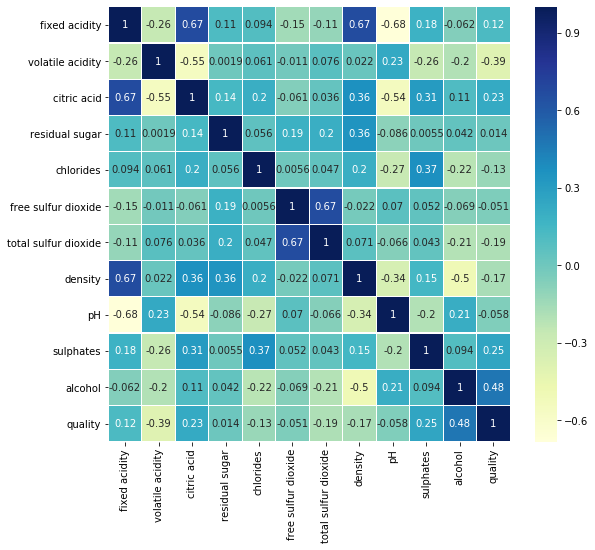

In [3]:
# Correlation Map
corrmat = red.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot=True) 

In [4]:
# Create a data frame specifically for wrangling & cleaning
red2 = red.drop(['quality', 'free sulfur dioxide', 'pH', 'residual sugar', 'fixed acidity'], axis = 1)
red2.shape

(1599, 7)

In [5]:
red2.columns

Index(['volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide',
       'density', 'sulphates', 'alcohol'],
      dtype='object')

In [6]:
red2.head()

,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,0.70,0.00,0.076,34.0,0.9978,0.56,9.4
1,0.88,0.00,0.098,67.0,0.9968,0.68,9.8
2,0.76,0.04,0.092,54.0,0.9970,0.65,9.8
3,0.28,0.56,0.075,60.0,0.9980,0.58,9.8
4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4


In [7]:
red2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 7 columns):
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
chlorides               1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
dtypes: float64(7)
memory usage: 87.5 KB


In [8]:
# Inter Quartile Ranges
Q1 = red2.quantile (0.25)
Q3 = red2.quantile (0.75)
IQR = Q3 - Q1

b = {'Q1': Q1, 'Q3': Q3, 'IQR': IQR, 'Lower Bound' : (Q1 - 1.5 * IQR), 'Upper Bound' : (Q3 + 1.5 * IQR)}
red_IQR = pd.DataFrame(b)
red_IQR

,Q1,Q3,IQR,Lower Bound,Upper Bound
volatile acidity,0.3900,0.640000,0.250000,0.015000,1.015000
citric acid,0.0900,0.420000,0.330000,-0.405000,0.915000
chlorides,0.0700,0.090000,0.020000,0.040000,0.120000
total sulfur dioxide,22.0000,62.000000,40.000000,-38.000000,122.000000
density,0.9956,0.997835,0.002235,0.992248,1.001187
sulphates,0.5500,0.730000,0.180000,0.280000,1.000000
alcohol,9.5000,11.100000,1.600000,7.100000,13.500000


In [9]:
# Create data frame of independent variables free of outliers
red2 = red2[~((red2 < (Q1 - 1.5 * IQR)) | (red2 > (Q3 + 1.5 * IQR))).any(axis=1)]
red2.shape

(1362, 7)

In [10]:
# Combine to form a data frame consisting of independent & dependent variables
#red_out = pd.concat([red2, red['quality']], axis = 1)
#red_out = red_out.dropna(axis=0)
red_out = pd.concat([red2, red['quality']], axis = 1, join = 'inner')
red_out.shape

(1362, 8)

In [11]:
quality_comp = pd.DataFrame({'Initial' : (red['quality'].value_counts()), 'Final' : (red_out['quality'].value_counts())})
quality_comp

,Initial,Final
5,681,573
6,638,558
7,199,170
4,53,42
8,18,15
3,10,4


In [12]:
# Save File for further processing
red_out.to_csv('winequality-red_undelimited_cleaned.csv', index = False)
red_out.shape

(1362, 8)

In [13]:
# Load the dataset and create a matrix of independent variables and a dependent variable vector
red_clean = pd.read_csv("winequality-red_undelimited_cleaned.csv")
X = red_clean.iloc[:, :-1].values
y = red_clean.iloc[:, 7].values

In [14]:
red_clean.head()

,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


In [15]:
red_clean.describe()

,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
count,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000
mean,0.522148,0.258172,0.078878,42.611601,0.996692,0.634897,10.409239,5.655653
std,0.165951,0.188768,0.014559,26.814724,0.001671,0.119445,1.008241,0.788185
min,0.120000,0.000000,0.041000,6.000000,0.992350,0.330000,8.400000,3.000000
25%,0.390000,0.090000,0.070000,22.000000,0.995580,0.550000,9.500000,5.000000
50%,0.520000,0.240000,0.078000,36.000000,0.996685,0.610000,10.200000,6.000000
75%,0.630000,0.400000,0.088000,58.000000,0.997800,0.710000,11.000000,6.000000
max,1.005000,0.780000,0.119000,122.000000,1.001000,0.990000,13.400000,8.000000


In [16]:
red_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 8 columns):
volatile acidity        1362 non-null float64
citric acid             1362 non-null float64
chlorides               1362 non-null float64
total sulfur dioxide    1362 non-null float64
density                 1362 non-null float64
sulphates               1362 non-null float64
alcohol                 1362 non-null float64
quality                 1362 non-null int64
dtypes: float64(7), int64(1)
memory usage: 85.2 KB


In [17]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [19]:
# Random Forest Classifier & Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predict Test set results
y_pred = classifier.predict(X_test)
y_pred

array([6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 7, 6, 7, 7, 7, 5, 5, 5, 5, 6, 5,
       5, 5, 6, 7, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5,
       5, 7, 6, 5, 6, 7, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5,
       6, 6, 6, 5, 7, 5, 6, 7, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5,
       5, 5, 7, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 7, 5, 6, 5, 5, 7, 5, 5, 7,
       5, 7, 5, 6, 5, 5, 7, 5, 6, 7, 6, 7, 6, 5, 5, 6, 6, 8, 6, 6, 7, 5,
       6, 6, 5, 7, 5, 5, 6, 5, 5, 6, 6, 5, 6, 6, 7, 5, 5, 6, 6, 5, 5, 7,
       6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5,
       5, 6, 6, 6, 6, 5, 5, 5, 7, 5, 7, 5, 7, 6, 5, 5, 5, 5, 6, 5, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 7, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6,
       6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6,
       6, 5, 6, 5, 5, 5, 5, 5, 7, 6, 6, 6, 7, 7, 7, 5, 5, 6, 5, 5, 5, 7,
       6, 5, 5, 5, 7, 7, 5, 5, 7], dtype=int64)

In [20]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix (y_test, y_pred)
cr = classification_report (y_test, y_pred)
cm

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[  0,   6,   1,   1,   0],
       [  0, 103,  15,   0,   0],
       [  0,  23,  78,  13,   0],
       [  0,   3,   7,  19,   0],
       [  0,   0,   3,   0,   1]], dtype=int64)

In [21]:
# Classification Report
cr

'              precision    recall  f1-score   support\n\n           4       0.00      0.00      0.00         8\n           5       0.76      0.87      0.81       118\n           6       0.75      0.68      0.72       114\n           7       0.58      0.66      0.61        29\n           8       1.00      0.25      0.40         4\n\n    accuracy                           0.74       273\n   macro avg       0.62      0.49      0.51       273\nweighted avg       0.72      0.74      0.72       273\n'

In [22]:
# k-fold Cross Validation 'Mean Accuracy' & 'Standard Deviation'
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 6)
accuracies.mean()

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=6.
  % (min_groups, self.n_splits)), Warning)


0.6519950329307485

In [184]:
accuracies.std()

0.023063117520083377

In [375]:
# FEATURE IMPORTANCE
# Import `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

names = red_clean.columns.values

rfc = RandomForestClassifier()
rfc.fit(X, y)

# Print the results
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 11), rfc.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.1759809299, 'alcohol'), (0.14848803735, 'density'), (0.14210751062, 'sulphates'), (0.14048223874, 'volatile acidity'), (0.13956513775, 'total sulfur dioxide'), (0.13101890442, 'chlorides'), (0.12235724121, 'citric acid')]


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [361]:
""""# Kernel SVM Classifier & Training set
from sklearn.svm import SVC
classifier = SVC(C = 1, kernel = 'rbf')
classifier.fit (X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [376]:
""""# Grid Search for Hyperparameter Tuning (to be used with Kernel SVM only)
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 0.5, 0.9]}
             ]
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 7, n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_accuracy"""

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=7.
  % (min_groups, self.n_splits)), Warning)


0.6538108356290174

In [315]:
""""best_parameters"""

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
"""
https://winefolly.com/review/wine-characteristics/
https://winefolly.com/review/sugar-in-wine-chart/
https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too